# Домашнее задание №4
## Задание №1
1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [1]:
import os #импортируем необходимые модули
import re 
import string 
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import matplotlib
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
os.chdir('C:\\Users\\User\\Desktop')

In [2]:
with open('Harry_Potter_and_the_Sorcerers_Stone.txt', 'r', encoding='utf-8') as f: #читаем файл с текстом
    book = f.read() 
book1 = book.lower() 
book2 = re.sub('(\,|\.|»|«|:|!|\?|;|‒|–|—|―|\(|\))',' ',book1)                 #очищаем текст от пунктуации
prelemmas = word_tokenize(book2)                                               #токенизируем текст с пом. nltk
wnl = WordNetLemmatizer()
lemmas0 = set()
lemmas = set()
lemmas0 = [wnl.lemmatize(word, pos = 'v') for word in prelemmas]                 #лемматизируем текст 
lemmas = [wnl.lemmatize(word1, pos = 'n') for word1 in lemmas0]
text = ' '.join(lemmas)                                                         #соединяем в единый текст и печатаем в файл
g = open('books.txt', 'tw', encoding='utf-8') 
g.write(text) 
g.close()
d = {}
count = len(lemmas)
for wordr in lemmas:                                              #создаем словарь с относительной частотностью лемм
    d[wordr] = lemmas.count(wordr)/ count
sorted_d = sorted(d.items(), key=lambda x: x[1], reverse=True)       #сортируем его

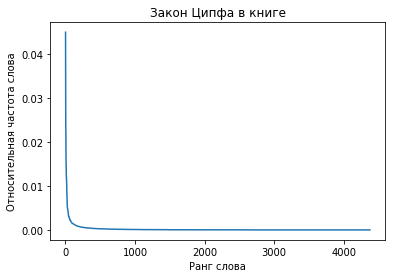

In [18]:
countl = 0
X=[]
Y=[]
for number in range(len(sorted_d)):                     #придаем иксам значения от одного до количества лемм
    countl += 1
    X.append(countl) 
Y = [element[1] for element in sorted_d]  #придаем игрикам относительную частоту - как второй элемент из кортежей из списка...
plt.title("Закон Ципфа в книге")        #озаглавливаем и печатаем график
plt.xlabel("Ранг слова")
plt.ylabel("Относительная частота слова")
plt.plot(X, Y) 
plt.show()

3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [29]:
sw = stopwords.words('english')                   #очищаем текст от стоп слов
filtered = [w for w in lemmas if w not in sw]
d2 = {}
c = len(filtered)
for w2 in filtered:                                 #считаем абсолютную частоту слов
    d2[w2] = filtered.count(w2)
sorted_2 = sorted(d.items(), key=lambda x: x[1], reverse=True)       #сортируем 

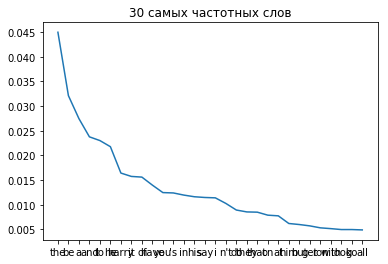

In [39]:
list30 = sorted_2[0:30]                  #задаем значения для графика
A = [element2[0] for element2 in list30]
B = [element3[1] for element3 in list30]
plt.title("30 самых частотных слов") #озаглавливаем и печатаем график
plt.plot(A, B) 
plt.show()